# PROJECT TITLE 

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [1169]:
import pandas as pd 
from IPython.display import Markdown, display
import itertools
import numpy as np
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels
import statsmodels.api as sm
from IPython.display import display, Markdown, Latex
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1170]:
df = pd.read_csv('data/kc_house_data.csv')
df = df.dropna()

In [1171]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [1172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [1173]:
df['view'].value_counts()

NONE         14241
AVERAGE        688
GOOD           348
FAIR           245
EXCELLENT      240
Name: view, dtype: int64

In [1174]:
df['view'] = df['view'].replace({'NONE': 0, "AVERAGE": 1, "GOOD": 2, "FAIR": 3, "EXCELLENT":4})

In [1175]:
df = df.drop(columns=['id', 'date', 'waterfront', 'grade', 'lat', 'condition','long', 'sqft_basement', 'sqft_lot', 'sqft_above', 'yr_renovated', 'sqft_living15', 'sqft_lot15','yr_built'])
df 

,price,bedrooms,bathrooms,sqft_living,floors,view,zipcode
1,538000.0,3,2.25,2570,2.0,0,98125
3,604000.0,4,3.00,1960,1.0,0,98136
4,510000.0,3,2.00,1680,1.0,0,98074
5,1230000.0,4,4.50,5420,1.0,0,98053
6,257500.0,3,2.25,1715,2.0,0,98003
...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2.0,0,98116
21592,360000.0,3,2.50,1530,3.0,0,98103
21593,400000.0,4,2.50,2310,2.0,0,98146
21594,402101.0,2,0.75,1020,2.0,0,98144


## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [1176]:
df['bedrooms'].value_counts()

3     7120
4     5079
2     2003
5     1183
6      192
1      141
7       23
8       10
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [1177]:
df = df.loc[df['bedrooms']<=4]
df

,price,bedrooms,bathrooms,sqft_living,floors,view,zipcode
1,538000.0,3,2.25,2570,2.0,0,98125
3,604000.0,4,3.00,1960,1.0,0,98136
4,510000.0,3,2.00,1680,1.0,0,98074
5,1230000.0,4,4.50,5420,1.0,0,98053
6,257500.0,3,2.25,1715,2.0,0,98003
...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2.0,0,98116
21592,360000.0,3,2.50,1530,3.0,0,98103
21593,400000.0,4,2.50,2310,2.0,0,98146
21594,402101.0,2,0.75,1020,2.0,0,98144


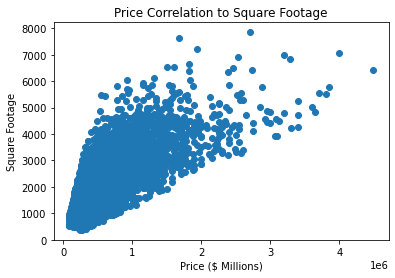

In [1189]:
X = df['price']
Y= df['sqft_living']

plt.scatter(X,Y)
plt.title("Price Correlation to Square Footage")
plt.xlabel("Price ($ Millions)")
plt.ylabel("Square Footage")
plt.show()

In [1179]:
df['bedrooms'].describe()

count    14343.000000
mean         3.194799
std          0.703683
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: bedrooms, dtype: float64

In [1180]:
df['sqft_living'].describe()

count    14343.000000
mean      1983.107927
std        827.470988
min        370.000000
25%       1390.000000
50%       1840.000000
75%       2420.000000
max       7850.000000
Name: sqft_living, dtype: float64

In [1181]:
lst_of_rec = df.loc[(df['bedrooms']>1) & (df['bedrooms']<5)]
lst_of_rec

,price,bedrooms,bathrooms,sqft_living,floors,view,zipcode
1,538000.0,3,2.25,2570,2.0,0,98125
3,604000.0,4,3.00,1960,1.0,0,98136
4,510000.0,3,2.00,1680,1.0,0,98074
5,1230000.0,4,4.50,5420,1.0,0,98053
6,257500.0,3,2.25,1715,2.0,0,98003
...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,2.0,0,98116
21592,360000.0,3,2.50,1530,3.0,0,98103
21593,400000.0,4,2.50,2310,2.0,0,98146
21594,402101.0,2,0.75,1020,2.0,0,98144


In [1182]:
len(lst_of_rec)/len(df)

0.9901694206233006

In [1183]:
df.loc[(df['sqft_living']>=2420) & (df['price']<=750000)]

,price,bedrooms,bathrooms,sqft_living,floors,view,zipcode
1,538000.0,3,2.25,2570,2.0,0,98125
15,650000.0,4,3.00,2950,2.0,2,98126
24,329000.0,3,2.25,2450,2.0,0,98030
29,719000.0,4,2.50,2570,2.0,0,98052
39,605000.0,4,2.50,2620,2.0,0,98056
...,...,...,...,...,...,...,...
21547,337000.0,4,2.50,2470,2.0,0,98038
21555,608500.0,4,3.50,2850,2.0,0,98056
21559,399950.0,3,2.50,3087,2.0,0,98023
21564,594866.0,3,3.00,2780,2.0,0,98065


In [1184]:
X = df.drop(columns='price')
y = df['price']

In [1185]:
df['sqft_living'].apply(lambda x: "Below Average" if x < 1983 else "Above Average")

1        Above Average
3        Below Average
4        Below Average
5        Above Average
6        Below Average
             ...      
21591    Below Average
21592    Below Average
21593    Above Average
21594    Below Average
21596    Below Average
Name: sqft_living, Length: 14343, dtype: object

In [1186]:
df['sqft_living'].mean()

1983.1079272118805

We learned the astype(float) approach below from https://stackoverflow.com/questions/56632463/why-we-have-to-convert-data-types-into-float-before-running-the-statsmodel-for-s




In [1187]:
from sklearn.model_selection import train_test_split

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?